In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB
import OneD.GlobalFuncs as GF

#Set up Directory for saving files/images/videos
# Will not rename this again
dirExtension = "1D_Codes/Non-Dim/Analysis"
Directory = os.getcwd()#+"/"+dirExtension #os.curdir() #"/home/boris/Documents/Research/Coding/1D codes/Non-Dim"
print(Directory)

############################################
# SET UP: shared by Wave and N-Body scenarios
############################################
#Set scales and parameters:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1

print(f"Length scale L = {L_s}")
print(f"Velocity scale v = {v_s}")

T = L_s/v_s
print(f"Time scale T = {T}")

M_s = L_s*v_s**2
print(f"Mass scale M = {M_s}")

#L, choice = GF.Startup_Choice()
L, mu, Num_bosons, r, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
m = mu*M_s

#Set up Grid
L = L*L_s #new length. Length of the box
N = 10**3
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

################
#PROMPT FOR FULL SIMULATION OR SNAPSHOTS
print("")
print("Do you want the full simulation [1] or snapshots [2]? Choose [1/2]")
sim_choice2 = int(input())
print("")

#For te
################

# #SET UP FOLDERS:
# if sim_choice2 == 1: 
#     folder_name = f"FuzzyMass{m}_Images"
#     if Num_bosons == 0:
#         folder_name = "ParticlesOnly_Images"
#     elif Num_stars == 0:
#         folder_name = f"OnlyFuzzyMass{m}_Images"
# elif sim_choice2 == 2:
#     folder_name = f"FuzzyMass{m}_Snapshots"
#     if Num_bosons == 0:
#         folder_name = "ParticlesOnly_Snapshots"
#     elif Num_stars == 0:
#         folder_name = f"OnlyFuzzyMass{m}_Snapshots"

# #print(os.path.exists(dirExtension+"/"+folder_name))
# if os.path.exists(dirExtension+"/"+folder_name) == True:
#     for file in os.listdir(Directory+"/"+folder_name):
#         os.remove(Directory+"/"+folder_name+"/"+file)
#     os.rmdir(Directory+"/"+folder_name)    
# os.mkdir(Directory+"/"+folder_name)

#RUN SIMULATION/CALCULATION
print("Calculating and Plotting...")
folder_name = "bla" 
stars, chi = GF.run_FDM_n_Bodies(sim_choice2, z,L,dz,mu, Num_bosons, r, sigma,Num_stars,v_s,L_s,Directory,folder_name, absolute_PLOT = False)
print("Calculation and Plotting Done. Now Saving Video...")

np.savetxt(f"Stars_Pos_m{m}.csv",[star.x for star in stars], delimiter = ",")
np.savetxt(f"Stars_Vel_m{m}.csv",[star.v for star in stars], delimiter = ",")
np.savetxt(f"Chi_m{m}.csv", chi)


/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis
Length scale L = 1
Velocity scale v = 1
Time scale T = 1.0
Mass scale M = 1

Choose a (non-dimensional) box length:


KeyboardInterrupt: Interrupted by user

In [3]:
np.savetxt("Stars_Pos.csv",[star.x for star in stars], delimiter = ",")
np.savetxt("Stars_Vel.csv",[star.v for star in stars], delimiter = ",")
np.savetxt("Chi.csv", chi)

NameError: name 'stars' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 
import scipy.optimize as opt

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB
import OneD.GlobalFuncs as GF

#Set up Directory for saving files/images/videos
# Will not rename this again
dirExtension = "1D_Codes/Non-Dim/Analysis"
Directory = os.getcwd()#+"/"+dirExtension #os.curdir() #"/home/boris/Documents/Research/Coding/1D codes/Non-Dim"
print(Directory)



stars_x = np.loadtxt("Stars_Pos.csv", dtype = float, delimiter=",")
stars_v = np.loadtxt("Stars_Vel.csv", dtype = float, delimiter=",")
chi = np.loadtxt("Chi.csv", dtype = complex, delimiter=",")

/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis


In [6]:

fig = plt.figure()
plt.plot(np.log(np.abs(z_left)),np.log(rho_left), "r-", label = "$z \\in [-L/2,0]$")
plt.plot(np.log(np.abs(z_right)),np.log(rho_right), 'b-', label = "$z \\in [0,L/2]$")
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()

plt.plot(np.log(-z_left[::-1]),np.log(rho_avgd))
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()



#ADDITIONAL:
#Calculate potential 
phi = GF.fourier_potentialV2(rho,L)
#Calculate Acceleration Field on Mesh:
a_grid = NB.acceleration(phi,L) 



NameError: name 'z_left' is not defined

<Figure size 432x288 with 0 Axes>

0.24124124124124124


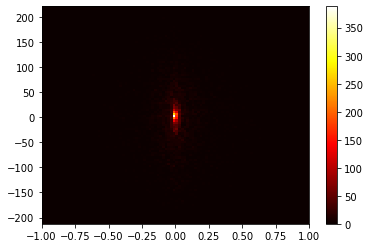

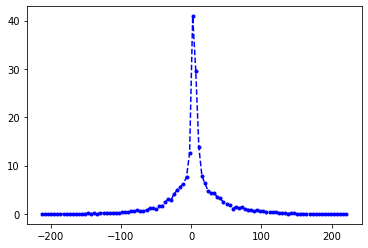

In [7]:
#hist, xedges, yedges = np.histogram2d(stars_x,stars_v,bins = [50,50])
#plt.imshow(hist,extent = (x_min,x_max,v_min,v_max), cmap = cm.hot, aspect = (x_max-x_min)/(v_max-v_min))
#plt.show()

#Re-center the system
z = np.linspace(-L/2,L/2,N)
max_index = 620
print(z[max_index])
stars_x_new = stars_x - z[max_index] #centroid_z

nbins = 100
hist, xedges, yedges, image = plt.hist2d(stars_x_new, stars_v, 
                            bins = [nbins,nbins], 
                            range = [[-L/2, L/2],[np.min(stars_v),np.max(stars_v)]],
                            #cmax = 250,
                            cmap = cm.hot)
plt.colorbar()
plt.show()

# print(hist)
# for i in range(len(hist)):
#     for j in range(len(hist)):
#         hist[i,j] = int(hist[i,j])
# print(hist)

def Abel(x_range: tuple, v_range: tuple,f):
    # f is a 2d-array. (A 2d histogram)

    x_min,x_max = x_range
    #v_min,v_max = v_range
    
    n_rows,n_cols = np.shape(f)

    #v_s = np.linspace(v_min,v_max,n_rows)
    x_s = np.linspace(x_min,x_max,n_cols)

    #dv = v_s[1]-v_s[0]
    dx = x_s[1]-x_s[0]

    holder = np.array([])
    for i in range(n_rows):
        #v = v_s[i]
        sum = 0
        for j in range(n_cols):
            #x = dx*j #x_s[j]. Note we only add up from x=0 to x->inf
            sum+= f[i][j]*dx
            
            # r = np.sqrt(v**2+x**2)
            # dr = np.sqrt(dv**2+dx**2)
            #
            # term1 = f[i][j]*r
            # term2 = np.sqrt(r**2-v**2)
            # sum+=dr*term1/term2
        holder = np.append(holder,sum)#2*sum)
    return holder

np.savetxt("hist.csv",hist,fmt ='%i',delimiter = ",")
hist = np.loadtxt("hist.csv",dtype = int,delimiter = ',')
v_min,v_max = np.min(stars_v),np.max(stars_v)
abel_transform = Abel((-L/2,L/2),(v_min,v_max),hist)

#print(abel_transform)
v_array = np.linspace(v_min,v_max,len(abel_transform))
plt.plot(v_array,abel_transform,'b--',marker = '.')
plt.show() 


/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis

Input r, m, Num_bosons, sigma, Num_stars: 


/home/boris/Documents/Research/Coding/OneD/WaveNonDim.py:128: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


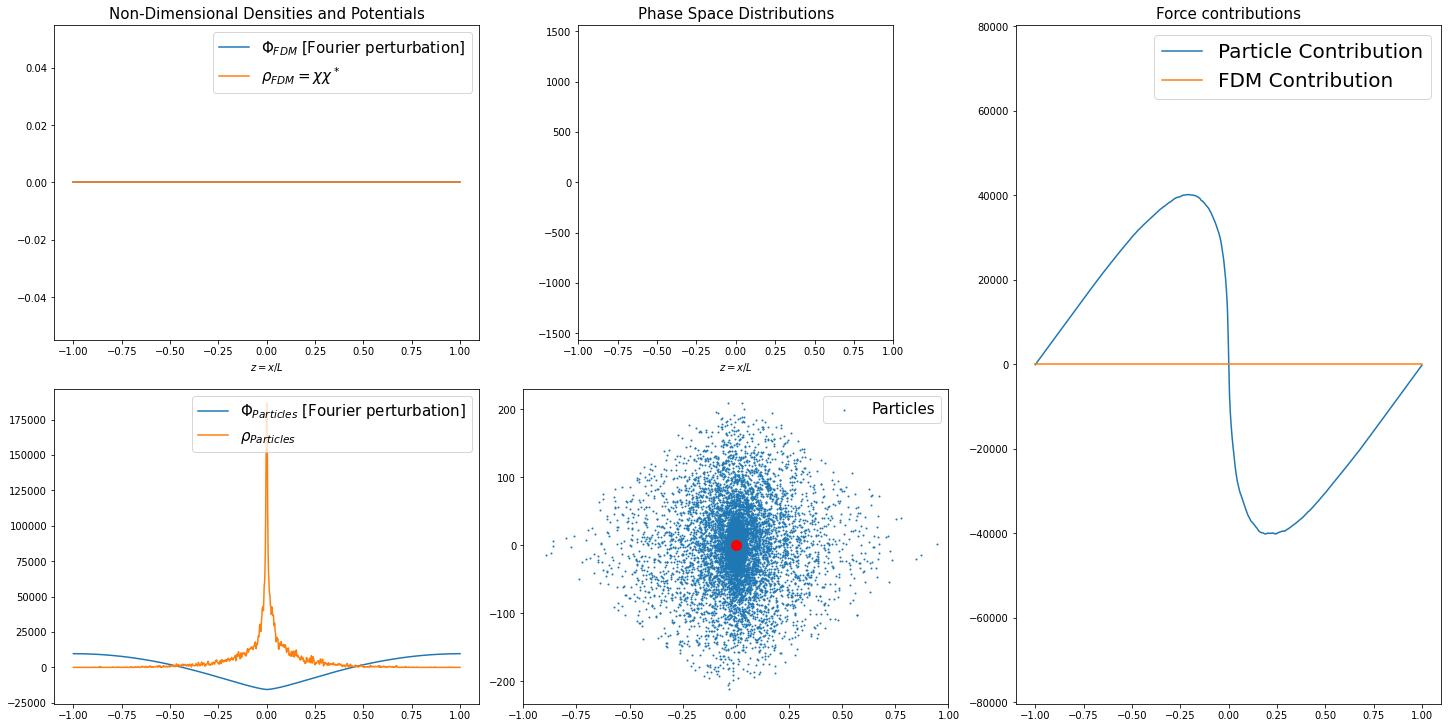

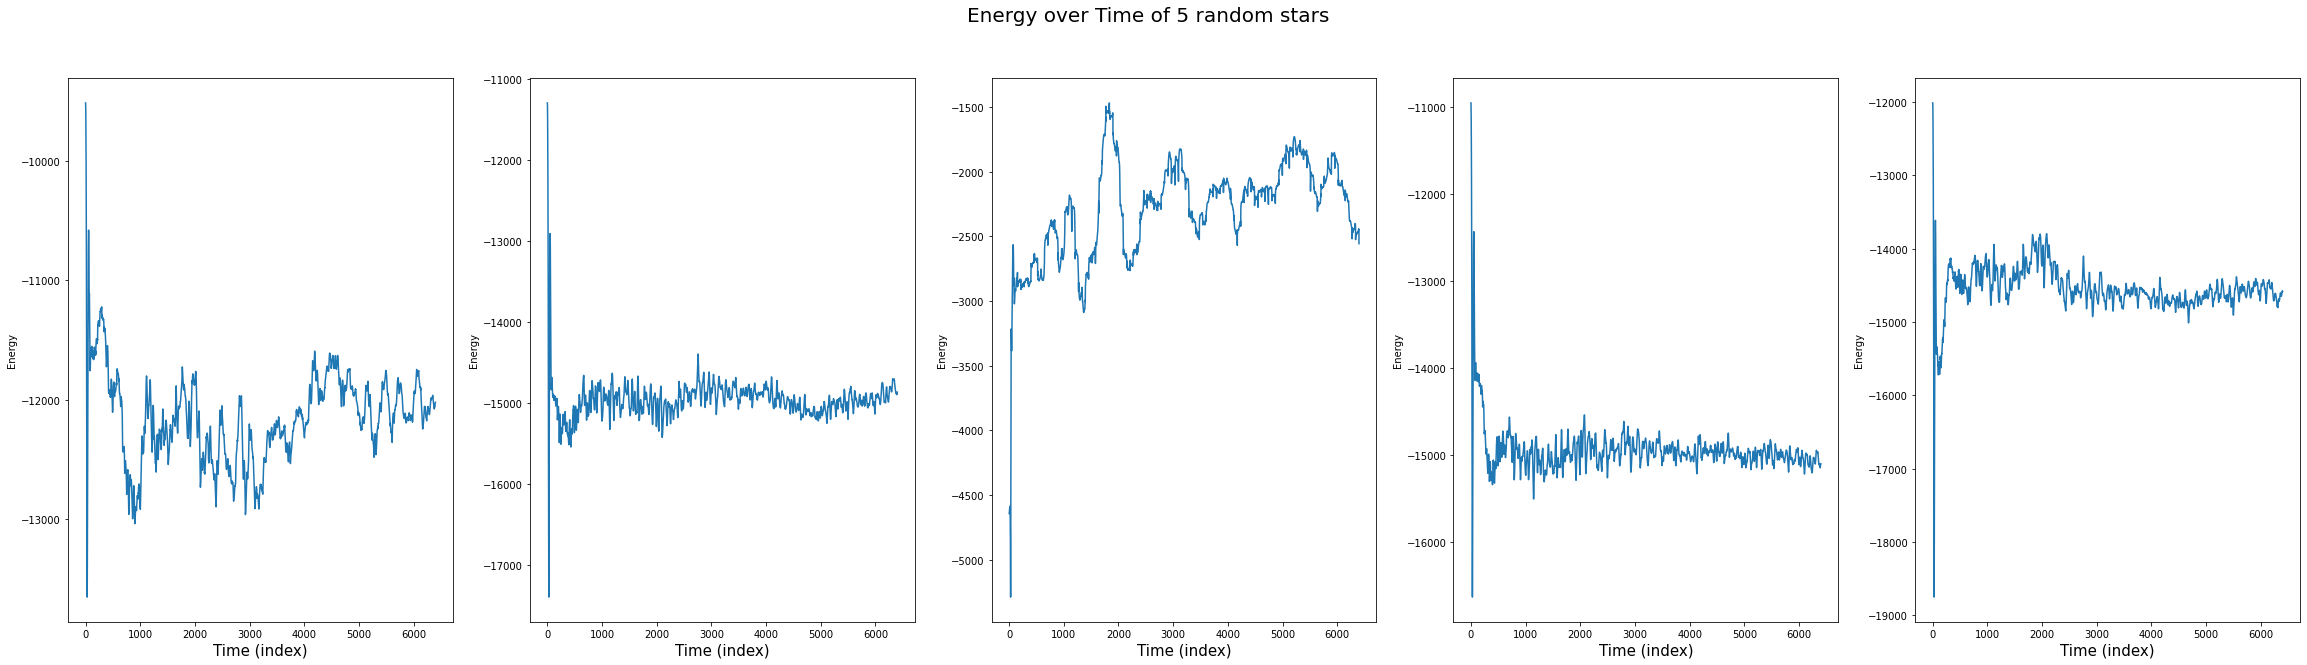

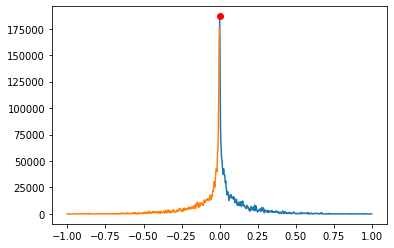

0.0


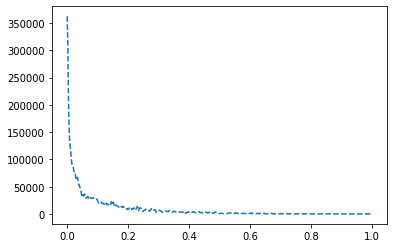

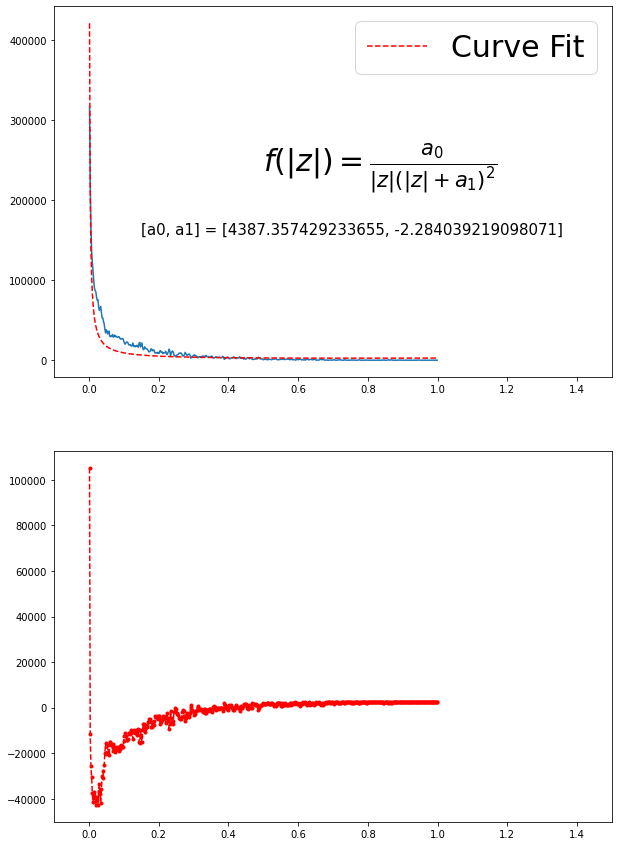

chi^2 = 2892046.692364122


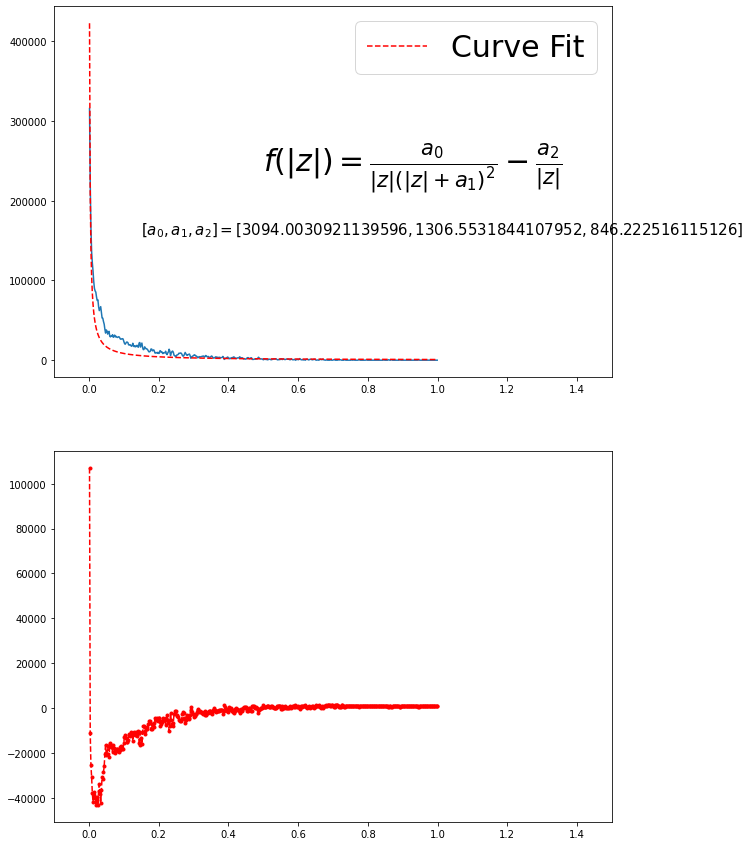

chi^2 = 3133901.2760018692


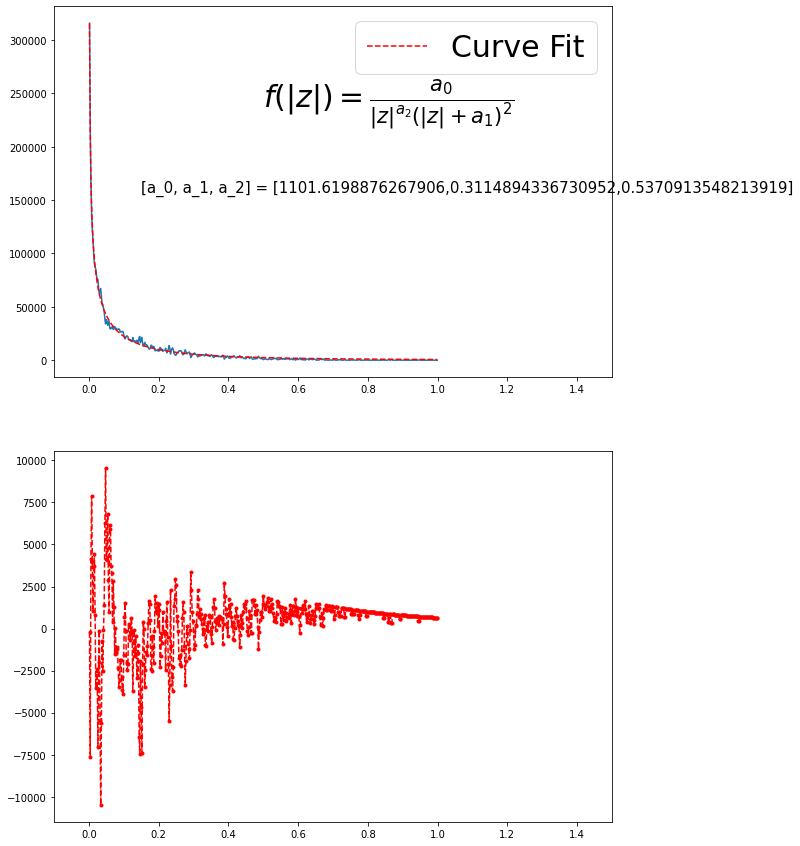

chi^2 = 277534.9082132913


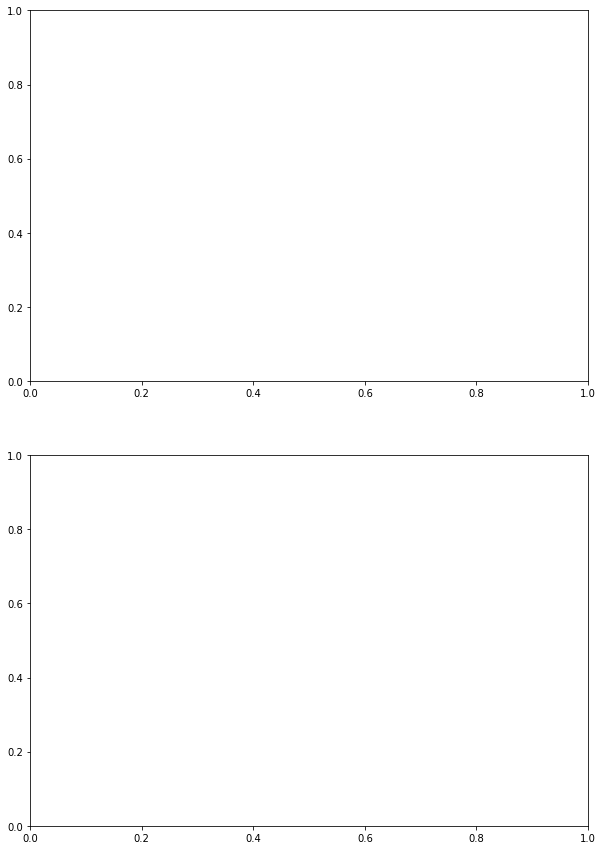

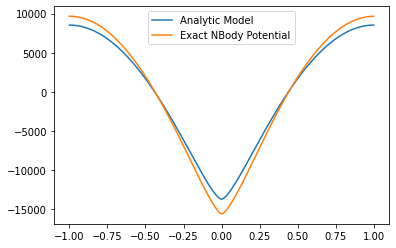

In [1]:
import Analysis 

In [1]:
#cd "/home/boris/Documents/Research/Coding"

#Possible choices for number of Bosons and/or Particles:
num_particles=('0' '10000')

for percent in "${percentages[@]}"; do
    if [ "$percent" != '0' ]; then
        #r parameters:
        fuzziness=('0.5' '0.1' '0.05' ' 0.01')
        #masses=('2' '1' '0.5' '0.1' '0.05' '0.04' '0.03' '0.02' '0.01')
    else
        fuzziness=('0.5') #Default, won't matter in calculation
        #masses=('1') #Default, won't matter in simulation
    fi

    for r in "${fuzziness[@]}"; do
        m=$r * 2

        for num_p in "${num_particles[@]}"; do
            if [ "$num_p" == '0' ]; then
                num_b=10000
            else 
                num_b=$num_p*$percent/(1-$percent)
            fi
            #Break loop if num_b and num_p are both zero
            if [ "$num_b" == '0' ]; then
                if [ "$num_p" == "0" ]; then
                    continue #No FDM or Particles -> go to next step of loop
                fi
            fi

            #Set Boson Mass array, depending on Number of Bosons
            if [ "$percent" != '0' ]; then
                #r parameters:
                
                #masses=('2' '1' '0.5' '0.1' '0.05' '0.04' '0.03' '0.02' '0.01')
            else
                fuzziness=('0.5') #Default, won't matter in calculation
                #masses=('1') #Default, won't matter in simulation
            fi

        #Now run simulation for given num_b, num_p and masses
            # printf $m

            echo "---------------------New Sim---------------------"
            printf 'Fuzziness r = %f
            Boson mass m = %f
            Num_bosons = %i
            Particle mass sigma = %f
            Num_particles %i  \n \n' "$r" "$m" "$num_b" "1" "$num_p"

                printf '%f\n%f\n%i\n%f\n%i' "$r" "$m" "$num_b" "1" "$num_p" | python3 -u 1D_Codes/Non-Dim/Analysis/Analysis.py 
            done
        done
    done
done

SyntaxError: unterminated string literal (detected at line 46) (763166371.py, line 46)